EXPLORATORY DATA ANALYSIS & INTRO

GOAL
1.investigate top-paying roles and skills in data science industry
2.use python to explore a real live dataset on job postings
3.for job seekers: use these insights to help find the best job opportunities.

FINAL DELIVERABLES:
1.create jupyter notebooks showcasing core skills in python
2.create a summary page via readme.md capturing your findings
3.share this project via github

EDA

In [30]:
#import the necessary libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

#load the dataset
dataset=load_dataset('lukebarousse/data_jobs')
df=dataset['train'].to_pandas()

#data cleanup
df['job_posted_date']=pd.to_datetime(df['job_posted_date'])
df['job_skills']=df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

filter for us data analyst role

In [31]:
#create a new df whic contains data analyst jobs and present in the us
df_DA_US=df[(df['job_title_short']=='Data Analyst') & (df['job_country']=='United States')]
df_DA_US

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
36,Data Analyst,Data Analyst,"Des Moines, IA",via Trabajo.org,Full-time,False,"Illinois, United States",2023-11-06 13:01:22,False,True,United States,None,NaN,NaN,Assuredpartners,None,None
68,Data Analyst,Sr. Research Data Analyst,"Baltimore, MD",via ZipRecruiter,Full-time,False,"New York, United States",2023-03-24 13:01:00,False,False,United States,None,NaN,NaN,Johns Hopkins Medicine,"[r, zoom]","{'programming': ['r'], 'sync': ['zoom']}"
73,Data Analyst,Entry level / Systems Data Analyst (Remote),Anywhere,via LinkedIn,Contractor,True,"Illinois, United States",2023-06-16 13:18:22,True,True,United States,None,NaN,NaN,Soft Magic,"[word, excel, powerpoint, outlook]","{'analyst_tools': ['word', 'excel', 'powerpoin..."
79,Data Analyst,Data Analyst/Report Writer,"Austin, TX",via Jobs Trabajo.org,Full-time,False,"Texas, United States",2023-08-07 13:18:27,True,False,United States,None,NaN,NaN,Nesco Resource,"[sas, sas, word, excel]","{'analyst_tools': ['sas', 'word', 'excel'], 'p..."
93,Data Analyst,IT Finance / TBM Data Analyst - Remote | WFH,Anywhere,via LinkedIn,Full-time,True,"New York, United States",2023-06-10 13:00:05,False,False,United States,None,NaN,NaN,Get It Recruit - Information Technology,"[oracle, azure, power bi, excel, word, powerpo...","{'analyst_tools': ['power bi', 'excel', 'word'..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785603,Data Analyst,Junior Data Analyst,"Santa Monica, CA",via Trabajo.org,Full-time,False,"California, United States",2023-09-12 06:00:50,False,False,United States,None,NaN,NaN,"Ramax Search, Inc.","[sql, vba, python, excel, flow]","{'analyst_tools': ['excel'], 'other': ['flow']..."
785626,Data Analyst,Data Acquisition Associate,"Tarrytown, NY",via Trabajo.org,Full-time,False,"New York, United States",2023-10-29 06:01:29,False,False,United States,None,NaN,NaN,Planet Group,[microsoft teams],{'sync': ['microsoft teams']}
785685,Data Analyst,Data Analyst,"Indianapolis, IN",via Trabajo.org,Full-time,False,"Illinois, United States",2023-07-16 06:01:27,True,False,United States,None,NaN,NaN,"Aara Technologies, Inc","[sql, excel]","{'analyst_tools': ['excel'], 'programming': ['..."
785703,Data Analyst,Data Analyst - CRYPTOGRAPHY - Full-time,Anywhere,via Snagajob,Full-time,True,"Texas, United States",2023-01-28 06:02:55,True,False,United States,None,NaN,NaN,Axelon Services Corporation,None,None


In [32]:
#now we will count the no of times each job location has come
df_DA_US['job_location'].value_counts().head(10)
#convert this to a df to plot it easily
df_plot=df_DA_US['job_location'].value_counts().head(10).to_frame()

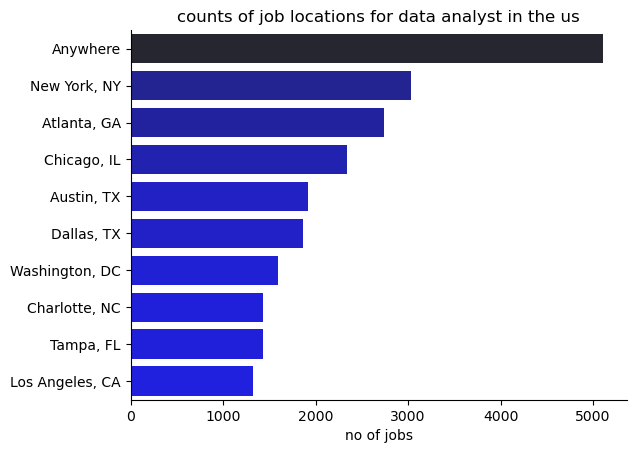

In [33]:
#lets plot this using seaborn
#sns.barplot(data='your data frame',x='here we will display the counts', y='job_location')
sns.barplot(data=df_plot,x='count',y='job_location',hue='count',palette='dark:b_r',legend=False)
#to remove the boders
sns.despine()
plt.title('counts of job locations for data analyst in the us')
plt.xlabel('no of jobs')
plt.ylabel('')
plt.show()

In [34]:
''' 
1.what we did was create a new df which contains data analyst jobs in the us
2.then we found out the no of times each job location came
3.by applying the value counts method
4.we converted it to a df for easy plotting
5.we ploted the graph using seaborn
'''

' \n1.what we did was create a new df which contains data analyst jobs in the us\n2.then we found out the no of times each job location came\n3.by applying the value counts method\n4.we converted it to a df for easy plotting\n5.we ploted the graph using seaborn\n'

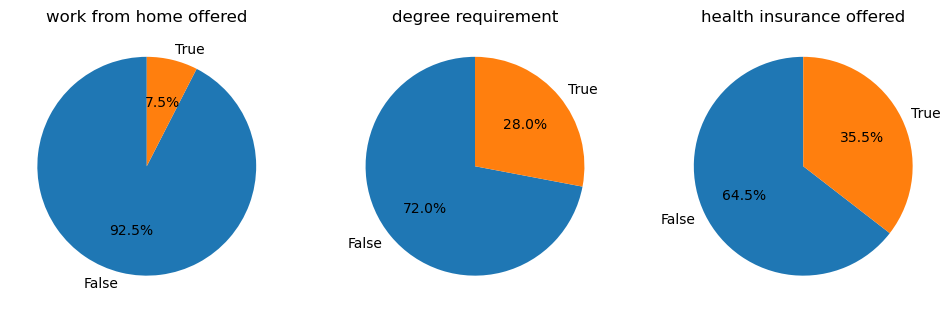

In [35]:
dict_column={
    #of the form column:title
    'job_work_from_home':'work from home offered',
    'job_no_degree_mention':'degree requirement',
    'job_health_insurance':'health insurance offered'
}

fig,ax=plt.subplots(1,3)
fig.set_size_inches((12,5))

#enumerate gives index and then value => i=>gives index and column,title=> column names
#for loop goes through each of the three questions one by one and draws a pie chart

for i, (column,title) in enumerate(dict_column.items()):
    ax[i].pie(df_DA_US[column].value_counts(), labels=['False','True'], autopct='%1.1f%%',startangle=90)
    ax[i].set_title(title)
    
plt.show()

In [36]:
''' 
dict_column.items() in very simple terms.

The Simple Explanation
dict_column.items() is like asking your dictionary: "Show me everything you have, as pairs of (key, value)."

It takes your dictionary and converts it into a list of pairs.

Think of your dictionary as a contact list in your phone:
contact_list = {
    'Alice': '555-1234',
    'Bob': '555-5678', 
    'Charlie': '555-9012'
}

When you call contact_list.items(), it gives you this:
[
    ('Alice', '555-1234'),
    ('Bob', '555-5678'),
    ('Charlie', '555-9012')
]
#gets converted into a list of key and value

'''

' \ndict_column.items() in very simple terms.\n\nThe Simple Explanation\ndict_column.items() is like asking your dictionary: "Show me everything you have, as pairs of (key, value)."\n\nIt takes your dictionary and converts it into a list of pairs.\n\nThink of your dictionary as a contact list in your phone:\ncontact_list = {\n    \'Alice\': \'555-1234\',\n    \'Bob\': \'555-5678\', \n    \'Charlie\': \'555-9012\'\n}\n\nWhen you call contact_list.items(), it gives you this:\n[\n    (\'Alice\', \'555-1234\'),\n    (\'Bob\', \'555-5678\'),\n    (\'Charlie\', \'555-9012\')\n]\n#gets converted into a list of key and value\n\n'

In [37]:
''' 
for i, (column,title) in enumerate(dict_column.items()): 

This line is like an organized counter that goes through your list of questions one by one, keeping track of two things:

Which number question it's on (is it the first, second, or third?)

The question itself and what it means

i = 0, 1, 2 (the position number)

column = 'job_work_from_home', 'job_no_degree_mention', 'job_health_insurance' (the technical column names)

title = 'work from home offered', 'degree requirement', 'health insurance offered' (the human-readable titles)

Why This is Useful in Your Code
You have three pie charts to create. The i counter (0, 1, 2) tells the code:

"For the first chart (i=0), use the first column and title"

"For the second chart (i=1), use the second column and title"

"For the third chart (i=2), use the third column and title


'''

' \nfor i, (column,title) in enumerate(dict_column.items()): \n\nThis line is like an organized counter that goes through your list of questions one by one, keeping track of two things:\n\nWhich number question it\'s on (is it the first, second, or third?)\n\nThe question itself and what it means\n\ni = 0, 1, 2 (the position number)\n\ncolumn = \'job_work_from_home\', \'job_no_degree_mention\', \'job_health_insurance\' (the technical column names)\n\ntitle = \'work from home offered\', \'degree requirement\', \'health insurance offered\' (the human-readable titles)\n\nWhy This is Useful in Your Code\nYou have three pie charts to create. The i counter (0, 1, 2) tells the code:\n\n"For the first chart (i=0), use the first column and title"\n\n"For the second chart (i=1), use the second column and title"\n\n"For the third chart (i=2), use the third column and title\n\n\n'

In [38]:
''' 
dict_column={
    'job_work_from_home':'work from home offered',
    'job_no_degree_mention':'degree requirement',
    'job_health_insurance':'health insurance offered'
}

fig,ax=plt.subplots(1,,3)
fig.set_size_inches((12,5))
for i, (column,title) in enumerate(dict_column.items()):
    ax[i].pie(df[column].value_counts(), labels=['False','True'], autopct='%1.1f%%',startangle=90)
    ax[i].set_title(title)
    
plt.show()

explanation:

This code creates three simple pie charts to answer three "Yes or No" questions about the data science jobs in the dataset.

1.The "Question Dictionary":
dict_column={
    'job_work_from_home':'work from home offered',
    'job_no_degree_mention':'degree requirement',
    'job_health_insurance':'health insurance offered'
}
This is like a translator. It tells the computer:

"When I say job_work_from_home, I mean 'work from home offered'."

"When I say job_no_degree_mention, I mean 'is a degree required?'" (Note: This one is often reversed in logic, where 'True' might mean no degree is mentioned).

"When I say job_health_insurance, I mean 'health insurance offered'."

2.Preparing the Canvas:
fig,ax=plt.subplots(1,3)
fig.set_size_inches((12,5))

This sets up an empty space for our charts, like preparing a blank page to draw on. It says: "I want 1 row of charts, and 3 charts in that row. Make the whole page 12 inches wide and 5 inches tall."

Drawing the Pie Charts:
The for loop is the main action. It goes through each of the three questions one by one and draws a pie chart.

df[column].value_counts(): This counts how many jobs said True and how many said False for that question.

labels=['False','True']: It puts a "False" label on one part of the pie and a "True" label on the other.

autopct='%1.1f%%': This calculates the percentage for each slice and shows it on the chart.

startangle=90: This just makes the first slice start at the top (like 12 o'clock on a clock) so all the charts look consistent.

ax[i].set_title(title): It puts the question (from our dictionary) as the title above each pie chart.

'''

' \ndict_column={\n    \'job_work_from_home\':\'work from home offered\',\n    \'job_no_degree_mention\':\'degree requirement\',\n    \'job_health_insurance\':\'health insurance offered\'\n}\n\nfig,ax=plt.subplots(1,,3)\nfig.set_size_inches((12,5))\nfor i, (column,title) in enumerate(dict_column.items()):\n    ax[i].pie(df[column].value_counts(), labels=[\'False\',\'True\'], autopct=\'%1.1f%%\',startangle=90)\n    ax[i].set_title(title)\n\nplt.show()\n\nexplanation:\n\nThis code creates three simple pie charts to answer three "Yes or No" questions about the data science jobs in the dataset.\n\n1.The "Question Dictionary":\ndict_column={\n    \'job_work_from_home\':\'work from home offered\',\n    \'job_no_degree_mention\':\'degree requirement\',\n    \'job_health_insurance\':\'health insurance offered\'\n}\nThis is like a translator. It tells the computer:\n\n"When I say job_work_from_home, I mean \'work from home offered\'."\n\n"When I say job_no_degree_mention, I mean \'is a degree r

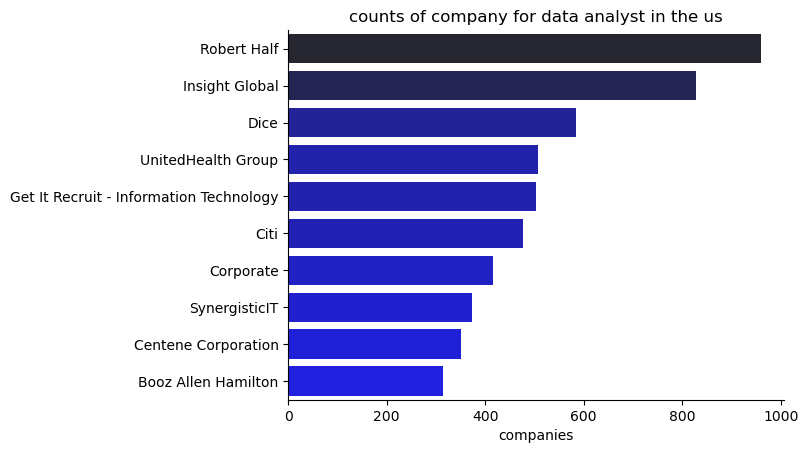

In [39]:
#now calculate what are the different counts of the company name
df_plot=df_DA_US['company_name'].value_counts().head(10).to_frame()

sns.barplot(data=df_plot,x='count',y='company_name',hue='count',palette='dark:b_r',legend=False)
sns.despine()
plt.title('counts of company for data analyst in the us')
plt.xlabel('companies')
plt.ylabel('')
plt.show()